In [21]:
# Importing Data dan Inspection
# Importlah dataset dari https://storage.googleapis.com/dqlab-dataset/data_retail.csv
# dan kemudian inspeksilah dataset tersebut dengan :
# 1. mencetak lima data teratas saja,
# 2. mencetak info dataset.

import pandas as pd

df = pd.read_csv(
    'data_retail.csv', sep=';')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      ----

In [22]:
# Data Cleansing
# Dua kolom yang menunjukkan terjadinya transaksi tidak bertipe datetime,
# maka ubahlah kedua kolom tersebut ke tipe data datetime.
# Kemudian cetaklah kembali 5 data teratas dari dataframe df dan juga tipe data masing-masing kolomnya.

# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(
    df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(
    df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.396000000   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999872   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999808   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608000000                     1467681                 22  
1 2018-12-25 11:02:41.269999872                     1269337                 41  
2 2019-01-24 09:40:02.000000000                      310915                 30  
3 2019-01-16 13:00:03.911000064                      722632                 27  
4 2018-11-22 12:53:41.529999872                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries,

In [23]:
# Churn Customers
# Untuk menentukan churn customers sesuai definisi yang telah diberikan, carilah :
# 1. transaksi paling terakhir kapan dilakukan.
# 2. klasifikasikanlah mana customer yang berstatus churn dan mana yang tidak.
# Setelah itu cetak lima data teratas dan informasi dataset.

# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['Last_Transaction']))

# Klasifikasikan customer yang berstatus churn atau tidak dengan boolean
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

2019-02-01 23:57:57.286000128
Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.396000000   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999872   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999808   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000000                     1467681   
1 2018-12-25 11:02:41.269999872                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000064                      722632   
4 2018-11-22 12:53:41.529999872                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False

In [24]:
# Menghapus kolom yang tidak diperlukan

# Hapus kolom-kolom yang tidak diperlukan
del df['no']
del df['Row_Num']

# Cetak lima data teratas
print(df.head())

   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.396000000   
1        29531  Sepatu 2014-07-23 01:02:11.493999872   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999808   
4        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000000                     1467681   
1 2018-12-25 11:02:41.269999872                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000064                      722632   
4 2018-11-22 12:53:41.529999872                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False  
4                 25    False  


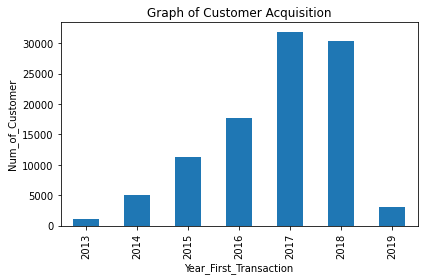

In [25]:
# Customer acquisition by year
# Setelah semuanya lancar, langkah berikutnya adalah membuat visualisasi data berupa trend of customer acquisition by year dengan meggunakan bar chart. 
# Untuk itu buatlah feature/kolom tambahan yang merupakan tahun dari First_Transaction dan tahun dari Last_Transaction masing-masingnya dengan nama Year_First_Transaction dan Year_Last_Transaction sebelum melakukan visualisasi.
import matplotlib.pyplot as plt

# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

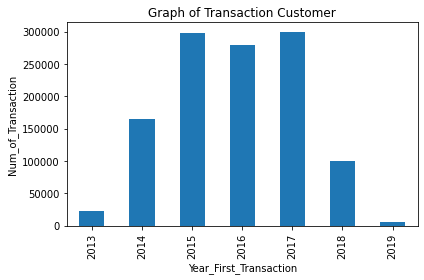

In [26]:
# Transaction by year
# Visualisasikanlah trend jumlah transaksi per tahunnya dengan menggunakan bar chart.
import matplotlib.pyplot as plt

plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

In [ ]:
# Average transaction amount by year
# Dengan menggunakan seaborn pointplot, visualisasikanlah tren dari tahun ke tahun rata-rata jumlah transaksi untuk tiap-tiap produknya.